# Problema de optimización usando Algoritmos Genéticos
<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/main/src/talleres_clase/prob_opt_algo_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Función Himmelblau

* Función: $f(x,y) = (x^2 +y -11)^2 + (x+y^2-7)^2$
* NO Var: 2
* Precisión: 6
* Espacio de búsqueda : $-5<x,y < 5$, $-∞ < z < 1000$

# Parámetros del algoritmo

* Método de selección: ruleta
* Cruza: En un punto
* Mutación: en un bit
* Número de generación: 30
* Tamaño de la población (número de individuos): 50
* Probabilidad de cruza: $P_c = 0.85$
* Probabilidad de mutación : 0.000000001

## Generación de la población

### Codificación de las variables

$$
L = [\log_2((l_{sup} - l_{inf})\times 10^{\text{precision}})]
$$


In [1]:
from math import log2, ceil


def length_variable(l_sup: int, l_inf: int , precision: int):
    """
    Nombre de la función : length_variable
    
    Descripción: Función que obtiene la cantidad de bits para representar la variable
    
    argumentos:
        * l_sup: límite superior de la función
    """
    return ceil(log2((l_sup - l_inf)*10**precision))

x_l_sup = 5
y_l_sup = 5

x_l_inf = -5
y_l_inf = -5

precision = 6

L_x = length_variable(x_l_sup, x_l_inf, precision)
L_y = length_variable(y_l_sup, y_l_inf, precision)
L_x, L_y

(24, 24)

In [2]:
# Función que genera poblacipob aleatori de m individuos de tamaño L
import random

m = 30 

def rand_population_binary(m,L):
    return [[random.randint(0,1)  for i in range(L)] for j in range(m)]

rand_population_binary(m,L_x)[0]

[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [3]:
rand_population_binary(m,L_y)[0]

[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]

In [4]:
# GENERAMOS LA POBLACIÓN INICIAL

import numpy as np

n_variables = 2
l_sup_vec = [x_l_sup, y_l_sup]
l_inf_vec = [x_l_inf, y_l_inf]

dimension_vec = []
genotipo = []
L_cromosoma = 0

# Generamos la poblacion inicial

for i in range(n_variables):
    L_var = length_variable(l_sup_vec[i], l_inf_vec[i], precision)
    L_cromosoma +=  L_var
    
    dimension_vec.append(L_var)
    genotipo.append(rand_population_binary(m, L_var))

genotipo

[[[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
  [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
  [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
  [1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0],
  [0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
  [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0],
  [0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
  [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0],
  [0, 1, 0, 

# Evaluación de población inicial

In [5]:
# Función que obtiene las potencias base 2 de un vector de bits (un individui)

def to_decimal(dimension,individuo):
    return sum([2**(i) for i in range(dimension-1,-1,-1) ]* np.array(individuo))

In [6]:
dimension = 24
individuo_inicial = genotipo[0][4]

to_decimal(dimension, individuo_inicial)

4673176

In [7]:
## la variable j representa cada bit de un individuo (secuencia de bits)
[(2**i)*j for i,j in zip(range(4-1,-1,-1),[1,0,1,0])]

[8, 0, 2, 0]

In [8]:
[2**i for i in range(4-1, -1,-1)] * np.array([1,0,1,0])

array([8, 0, 2, 0])

In [9]:
# Función que decodifica el vector a un valor real

def binary2real(i_sup, i_inf, dimension, individuo):
    return i_inf+ (to_decimal(dimension, individuo)* ((i_sup-i_inf)/(2**len(individuo)-1)))

In [10]:
for i in genotipo[1]:
    print(binary2real(5, -5, 24, i))

-3.5896115654475427
-4.031673612098313
0.20503134757467212
-1.0147962579009686
3.04703998846054
2.105421847428193
-2.5823305596310235
-2.462422100449926
-3.798688578527485
-1.4340952893552354
-0.9873721592052078
1.9182870935372769
4.66436384107851
-1.3474098651057402
1.7910448784258888
1.342680832307388
-4.066257421151246
2.095588868593506
3.9348142704256936
1.2805632520057708
-0.7089612310505649
-1.053797367441497
2.8395615720487575
2.291558819506098
4.945541020962061
2.3802094090109716
2.7750687465112653
-0.5775526510210423
4.934464689163249
2.315397698604923


In [11]:
def binary2real(i_sup, i_inf, dimension, poblacion):
    return [i_inf+ (to_decimal(dimension, individuo)* ((i_sup-i_inf)/(2**len(individuo)-1))) for individuo in poblacion]

In [12]:
binary2real(5, -5, 24,genotipo[0])

[-1.6683373849593033,
 -4.708621484555095,
 2.89634811260391,
 -3.945386942946133,
 -2.2145698794466186,
 3.639342107733613,
 -2.6797448205795775,
 2.0002464652208367,
 -4.582217906845683,
 0.029056371990225927,
 -3.0680840055992604,
 2.7061973635075907,
 2.2112040049555306,
 -2.0769117520398948,
 -0.9375611506438943,
 -3.668416063095097,
 -0.8159658799151108,
 -2.1199343872031204,
 0.5195185851763835,
 -0.8025643707850199,
 -2.9680000524520906,
 2.319628436543252,
 -4.159746119960912,
 3.8897805744278777,
 -1.7733995183348368,
 4.722487909942144,
 2.5557301971751567,
 0.9793970572589075,
 0.8206168306241528,
 -0.4583981906412955]

In [13]:
# Generamos la lista que contiene el fenotipo, es decir, realizamos la decodificación
## Bits ---> reales

feno = [[] for i in range(m)]

for i in range(n_variables):
  # Obtenemos los limites para cada variable
  i_sup = l_sup_vec[i]
  i_inf = l_inf_vec[i]

  pob = genotipo[i]

  dim = dimension_vec[i]

  b2r = binary2real(i_sup, i_inf, dim, pob)
  
  for j in range(m):
    feno[j].append(b2r[j])

In [14]:
feno

[[-1.6683373849593033, -3.5896115654475427],
 [-4.708621484555095, -4.031673612098313],
 [2.89634811260391, 0.20503134757467212],
 [-3.945386942946133, -1.0147962579009686],
 [-2.2145698794466186, 3.04703998846054],
 [3.639342107733613, 2.105421847428193],
 [-2.6797448205795775, -2.5823305596310235],
 [2.0002464652208367, -2.462422100449926],
 [-4.582217906845683, -3.798688578527485],
 [0.029056371990225927, -1.4340952893552354],
 [-3.0680840055992604, -0.9873721592052078],
 [2.7061973635075907, 1.9182870935372769],
 [2.2112040049555306, 4.66436384107851],
 [-2.0769117520398948, -1.3474098651057402],
 [-0.9375611506438943, 1.7910448784258888],
 [-3.668416063095097, 1.342680832307388],
 [-0.8159658799151108, -4.066257421151246],
 [-2.1199343872031204, 2.095588868593506],
 [0.5195185851763835, 3.9348142704256936],
 [-0.8025643707850199, 1.2805632520057708],
 [-2.9680000524520906, -0.7089612310505649],
 [2.319628436543252, -1.053797367441497],
 [-4.159746119960912, 2.8395615720487575],
 [

In [15]:
def f_himmelblau(X):
  x,y = X
  return (x**2 + y -11)**2 + (x + y**2 -7)**2

In [16]:
objv = [f_himmelblau(f) for f in feno]
objv

[157.17068896625204,
 71.63567229696868,
 22.28620027675821,
 110.93024038652584,
 9.299091045862898,
 20.074016804973688,
 50.04462957302159,
 90.65037919170118,
 46.525666947217616,
 178.7362161666283,
 89.31260056294481,
 3.4682660398767506,
 289.98738629488093,
 117.27061151045831,
 91.75804949621994,
 93.03896832341475,
 283.38511995587805,
 41.808812664289206,
 127.21699403152945,
 120.34070743302847,
 98.00293957740023,
 57.27460995922319,
 93.18450724615137,
 45.82544101592191,
 254.48375355582672,
 198.677663612167,
 13.47317381842878,
 145.09139518706942,
 359.2078536764001,
 76.21549962012024]

## Selección

En la selección vamos a escoger a los individuos con las mejores condiciones para contribuir a la generación de la siguiente generación.

Para esto, tenemos que calcular la aptitud de cada individuo.

### Aptitud

In [17]:
## Generación de la aptitud con normalización
## Como estamos en un problema de minimización, para obtener la aptitud de los valores de la función objetivo,
## la propuesta es usar la inversa de estos valores, pues la inversa de un valor muy pequeño, es superior a la inversa de un
## valor grande, de manera que en el primer caso, la aptitud será mayor
val_min = min(objv)
val_max = max(objv)

objv_norm = [ (((i-val_min)/(val_max-val_min))+0.0001)**-1 for i in objv]

for i,j in zip(objv, objv_norm):
  print(f"{i}--> {j}")

157.17068896625204--> 2.3139340621323705
71.63567229696868--> 5.215895060753112
22.28620027675821--> 18.868615004962
110.93024038652584--> 3.3092809393738616
9.299091045862898--> 60.640196784109364
20.074016804973688--> 21.376879157129743
50.04462957302159--> 7.631941660830496
90.65037919170118--> 4.078755117473611
46.525666947217616--> 8.255164298632259
178.7362161666283--> 2.0292780164703883
89.31260056294481--> 4.142291182247611
3.4682660398767506--> 10000.0
289.98738629488093--> 1.2414369571316255
117.27061151045831--> 3.1249656478245553
91.75804949621994--> 4.027604280893393
93.03896832341475--> 3.970029807673054
283.38511995587805--> 1.270714422221983
41.808812664289206--> 9.269816287592073
127.21699403152945--> 2.873866734563969
120.34070743302847--> 3.0429016057254885
98.00293957740023--> 3.761643826199036
57.27460995922319--> 6.607112109970965
93.18450724615137--> 3.963592123261005
45.82544101592191--> 8.391519695587009
254.48375355582672--> 1.417000930196641
198.677663612167-

In [18]:
## Generacion de aptitud escalada

def scaled_fitness(new_max, new_min, original_fitness):
  val_max = max(original_fitness)
  val_min = min(original_fitness)

  y = np.array([new_min, new_max])
  X = np.matrix([[val_min, 1],[1, val_max]])

  a,b = np.ravel(X.I @ y)

  return [b*i + a for i in original_fitness]

scaled_fitness(100,50, objv_norm)

[50.01156917037636,
 50.02607897551458,
 50.094342575918326,
 50.01654590481235,
 50.30320048690285,
 50.10688389680459,
 50.03815920863578,
 50.02039327574132,
 50.041275321855956,
 50.01014589013382,
 50.02071095606836,
 100.00000000000001,
 50.00620668479773,
 50.01562432834538,
 50.02013752155586,
 50.01984964918688,
 50.00635307212465,
 50.04634858185149,
 50.01436883376652,
 50.01521400813078,
 50.01880771926909,
 50.03303506083024,
 50.0198174607645,
 50.04195709884755,
 50.00708450467183,
 50.00910958325725,
 50.177152150839326,
 50.0125557207608,
 50.00499900004999,
 50.024437935565686]

In [19]:
# Identificamos cuales son los individuos con el mejor fitness
suma = sum(objv_norm)
objv_norm = [i/suma  for i in objv_norm]
aptitud = sorted(enumerate(objv_norm),key = lambda tup: tup[1], reverse=True)


In [20]:
aptitud

[(11, 0.9768987083336403),
 (4, 0.00592393299114942),
 (26, 0.0034612038820178285),
 (5, 0.002088304563680436),
 (2, 0.001843272562639212),
 (17, 0.0009055671557838838),
 (23, 0.0008197664751575252),
 (8, 0.0008064459340415836),
 (6, 0.000745563395054301),
 (21, 0.0006454479286046188),
 (1, 0.0005095401147653529),
 (29, 0.00047747751895804675),
 (10, 0.00040465989054795187),
 (7, 0.00039845306058691965),
 (14, 0.0003934561419683796),
 (15, 0.00038783169911618567),
 (22, 0.0003872028025575067),
 (20, 0.00036747449950250507),
 (3, 0.00032328322751874614),
 (13, 0.0003052774904946806),
 (19, 0.00029726066482195897),
 (18, 0.0002807476700918558),
 (27, 0.00024532311537917023),
 (0, 0.0002260479196466326),
 (9, 0.0001982399073139774),
 (25, 0.00017799257053336597),
 (24, 0.00013842663784166653),
 (16, 0.00012413592777295833),
 (12, 0.00012127581598995297),
 (28, 9.768010282308171e-05)]

In [21]:
from ast import Index
# Selección por el método de la ruleta

n = int(m/2)
suma_acumulada = np.cumsum([ v for k,v in aptitud])

individuos_dict = {i:{} for i in range(n)}

for pareja in range(n):
  for individuo in range(2):
    aleatorio = random.random()
    index_ind = np.where(suma_acumulada >= aleatorio)[0][0]
    cromosoma = []

    for var in range(n_variables):
      cromosoma.extend(genotipo[var][aptitud[index_ind][0]])
    individuos_dict[pareja][individuo]=cromosoma


## Cruza
* Es un proceso que genera una recombinación de los alelos mediante el intercambio de segmentos entre pares de cromosomas.
* Es usado para combinar la información genética de dos individuos para genear (usualmente) dos nuevos individuos.

## Cruza en un punto


In [22]:
# Escogemos de forma aleatoria un punto de cruza
punto_cruza = random.randint(0,L_cromosoma)



In [23]:
# Tomemos la pareja 0 y realizamos la cruza para generar dos individuos nuevos
primer_nuevo_individuo = individuos_dict[0][0][:punto_cruza] + individuos_dict[0][1][punto_cruza:]
segundo_nuevo_individuo = individuos_dict[0][1][:punto_cruza] + individuos_dict[0][0][punto_cruza:]
len(primer_nuevo_individuo),len(segundo_nuevo_individuo)

(48, 48)

### Generamos la nueva población a partir de la cruza de todas las parejas

In [24]:
nueva_poblacion = []
for pareja in range(n):
  punto_cruza = random.randint(0, L_cromosoma)
  primer_nuevo_individuo = individuos_dict[0][0][:punto_cruza] + individuos_dict[0][1][punto_cruza:]
  segundo_nuevo_individuo = individuos_dict[0][1][:punto_cruza] + individuos_dict[0][0][punto_cruza:]

  nueva_poblacion.append(primer_nuevo_individuo)
  nueva_poblacion.append(segundo_nuevo_individuo)

nueva_poblacion

[[1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1],
 [1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1],
 [1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1],
 [1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1],
 [1,
  1,
  0,
  0,
  0,
  1,
  0,
 

## Mutación 
* La mutación es el último operador genético en el proceso de generar la nueva población.
* La mutación es un proceso donde un alelo (bit) de cromosoma es reemplazado de forma aleatoria para generar un nuevo cromosoma.

In [25]:
mutacion_param = (1/L_cromosoma)

for index_ind, ind in enumerate(nueva_poblacion):
  aleatorio = random.random()
  if aleatorio < mutacion_param:
    print("muta")
    punto_mutacion = random.randint(0,L_cromosoma)
    nueva_poblacion[index_ind][punto_mutacion] = int(not nueva_poblacion[index_ind][punto_mutacion])

# Ajustamos la nueva población al formato que hemos estado usando

In [26]:
inicio = 0
fin = 0
nueva_poblacion_format = []

for var in range(n_variables):
  nueva_poblacion_var = []
  fin += dimension_vec[var]
  for individuo in nueva_poblacion:
    nueva_poblacion_var.append(individuo[inicio:fin])

  nueva_poblacion_format.append(nueva_poblacion_var)
  inicio += fin

# Evaluación de la nueva población
## Decodificar la nueva población para obtener su fenotipo

In [27]:
# Generamos la lista que contiene el fenotipo, es decir, realizamos la decodificación
## Bits ---> reales

feno = [[] for i in range(m)]

for i in range(n_variables):
  # Obtenemos los limites para cada variable
  i_sup = l_sup_vec[i]
  i_inf = l_inf_vec[i]

  pob = nueva_poblacion_format[i]

  dim = dimension_vec[i]

  b2r = binary2real(i_sup, i_inf, dim, pob)
  
  for j in range(m):
    feno[j].append(b2r[j])
feno

[[2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973635075907, 1.9182870935372769],
 [2.7061973

In [28]:
objv = [f_himmelblau(i) for i in feno]
objv

[3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506,
 3.4682660398767506]

## TODO EST FUE PARA UNA SOLA GENERACIÓN ...

Para ejecutar el algoritmo más generaciones, construyamos las funciones:

* APTITUD
* SELECCION
* CRUZA
* MUTACION
* DECODE
* OBJFUN

In [63]:
# Función que genera la estructura de datos Fenotipo
def DECODE(n_variables,m,i_sup_vec,i_inf_vec,dimension_vec,pob_vec):

    feno = [[] for i in range(m)]

    for i in range(n_variables):
        i_sup = i_sup_vec[i]
        i_inf = i_inf_vec[i]
        pob = pob_vec[i]
        dim = dimension_vec[i]
        b2r = binary2real(i_sup,i_inf,dim,pob)
        for k in range(m):
            feno[k].append(b2r[k])

    return feno

# Funcion que genera la estructura de datos de la función objetivo
def OBJFUN(f,feno):
    return [f(i) for i in feno]

# Función que genera la aptitud de los individuos
def APTITUD(objv):

    val_max = max(objv)
    val_min = min(objv)


    objv_norm = [(((i-val_min)/(val_max-val_min))+0.01)**-1 for i in objv]
    suma = sum(objv_norm)
    key_objv = [(k,i/suma) for (k,i) in enumerate(objv_norm)]
    objv_sort = sorted(key_objv,key=lambda tup: tup[1],reverse=True)

    return objv_sort

# Función que selecciona a los mejores individuos
def SELECCION(aptitud,n_variables,población):
    n = int(len(aptitud)/2)
    suma_acumulada = np.cumsum([v for (k,v) in aptitud])

    individuos_dict = {i:{} for i in range(n)}

    for pareja in range(n):
        for individuo in range(2):
            aleatorio = random.random()
            index_ind = np.where(suma_acumulada >= aleatorio)[0][0]
            cromosoma = []
            for gen in range(n_variables):
                cromosoma.extend(población[gen][aptitud[index_ind][0]])
            individuos_dict[pareja][individuo] = cromosoma

    return individuos_dict

def CRUZA(seleccion,length_total_cromosoma):
    n = len(seleccion)

    nueva_poblacion = []

    for pareja in range(n):
        punto_cruza = random.randint(0, length_total_cromosoma)

        primer_nuevo_individuo = seleccion[pareja][0][0:punto_cruza] + seleccion[pareja][1][punto_cruza:length_total_cromosoma]
        segundo_nuevo_individuo = seleccion[pareja][1][0:punto_cruza] + seleccion[pareja][0][punto_cruza:length_total_cromosoma]

        nueva_poblacion.append(primer_nuevo_individuo)
        nueva_poblacion.append(segundo_nuevo_individuo)

    return nueva_poblacion

def MUTACION(nueva_poblacion,length_total_cromosoma,n_variables,dimension_vec):

    #mutacion_param = 2/length_total_cromosoma
    mutacion_param = 0.5
    n = len(nueva_poblacion)
    
    """
    for individuo in range(n):
         muta_random = np.array([random.random() for i in range(length_total_cromosoma)])
         muta_index = np.where(muta_random < mutacion_param)[0]

         for i in muta_index:
             nueva_poblacion[individuo][i] = int(not nueva_poblacion[individuo][i])
    """
    for ind_index, ind in enumerate(nueva_poblacion):
        if random.random() < mutacion_param:
            punto_cruza = random.randint(0, L_cromosoma-1)
            nueva_poblacion[ind_index][punto_cruza] = int(not nueva_poblacion[ind_index][punto_cruza])
            
    inicio = 0
    fin = 0
    nueva_poblacion_format = []

    for gen in range(n_variables):
        nueva_poblacion_gen = []
        fin += dimension_vec[gen]
        for individuo in nueva_poblacion:
            nueva_poblacion_gen.append(individuo[inicio:fin])

        nueva_poblacion_format.append(nueva_poblacion_gen)
        inicio +=dimension_vec[gen]

    return nueva_poblacion_format

## Ejecutemos el algoritmo para varias generaciones

In [41]:
# Parámetros del algoritmo

m = 2000
n_variables = 2
i_sup_vec = [5, 5]
i_inf_vec = [-5, -5]
precision = 10
generaciones = 40

dimension_vec = []
genotipo = []
length_total_cromosoma = 0

# Generamos la poblacion inicial
for i in range(n_variables):
    length_cromosoma_var = length_variable(l_sup_vec[i], l_inf_vec[i], precision)
    length_total_cromosoma +=  length_cromosoma_var
    
    dimension_vec.append(length_cromosoma_var)
    genotipo.append(rand_population_binary(m, length_cromosoma_var))

# Iniciamos el ciclo evolutivo
print("Evaluación de la población inicial")
feno = DECODE(n_variables, m, i_sup_vec, i_inf_vec, dimension_vec, genotipo)
objv = OBJFUN(f_himmelblau, feno)

resultados = []
mejor_individuo = 0
mejor_valor = 100000000000000
fitness_values = []

for it in range(generaciones):
  print("-----------------------------")
  print("-%%%%%%%%%%%%%%%%%%%%%%%%%%%-")
  print("        Generacón {}".format(it))
  print("-%%%%%%%%%%%%%%%%%%%%%%%%%%%-")
  print("-----------------------------")

  aptitud =  APTITUD(objv)
  seleccion = SELECCION(aptitud, n_variables, genotipo)
  genotipo = CRUZA(seleccion, length_total_cromosoma)
  genotipo = MUTACION(genotipo, length_total_cromosoma, n_variables, dimension_vec)
  feno = DECODE(n_variables, m, i_sup_vec, i_inf_vec, dimension_vec, genotipo)
  objv = OBJFUN(f_himmelblau, feno)
  resultados.append(min(objv))
  mejor_individuo = objv.index(min(objv))

  if objv[mejor_individuo] < mejor_valor:
    mejor_valor = objv[mejor_individuo] 
    mejor_vector = feno[mejor_individuo]
  
  fitness_values.append(mejor_valor)


Evaluación de la población inicial
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 1
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 2
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 3
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 4
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 5
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 6
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
---------------

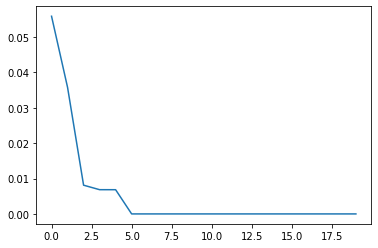

In [42]:
import matplotlib.pyplot as plt

plt.plot(fitness_values[:20])
plt.show()

In [43]:
mejor_valor

8.706042769836046e-07

In [44]:
f_himmelblau(mejor_vector)

8.706042769836046e-07

In [45]:
mejor_vector

[3.000002547618351, 2.0002247640295554]

In [46]:
np.random.choice(["Easom function","Eggholder function"])

'Eggholder function'

## Eggholder function

In [64]:
from math import sqrt

def eggholder(X):
    x,y = X
    return -1*(y + 47)*np.sin(sqrt(abs((x/2)+(y+47)))) - ( x*np.sin(sqrt(abs(x -(y+47)))))

In [69]:
# Parámetros del algoritmo

m = 1000
n_variables = 2
i_sup_vec = [512, 512]
i_inf_vec = [-512, -512]
precision = 10
generaciones = 100

dimension_vec = []
genotipo = []
length_total_cromosoma = 0

# Generamos la poblacion inicial
for i in range(n_variables):
    length_cromosoma_var = length_variable(l_sup_vec[i], l_inf_vec[i], precision)
    length_total_cromosoma +=  length_cromosoma_var
    
    dimension_vec.append(length_cromosoma_var)
    genotipo.append(rand_population_binary(m, length_cromosoma_var))

# Iniciamos el ciclo evolutivo
print("Evaluación de la población inicial")
feno = DECODE(n_variables, m, i_sup_vec, i_inf_vec, dimension_vec, genotipo)
objv = OBJFUN(eggholder, feno)

resultados = []
mejor_individuo = 0
mejor_valor = 100000000000000
fitness_values = []

for it in range(generaciones):
  print("-----------------------------")
  print("-%%%%%%%%%%%%%%%%%%%%%%%%%%%-")
  print("        Generacón {}".format(it))
  print("-%%%%%%%%%%%%%%%%%%%%%%%%%%%-")
  print("-----------------------------")

  aptitud =  APTITUD(objv)
  seleccion = SELECCION(aptitud, n_variables, genotipo)
  genotipo = CRUZA(seleccion, length_total_cromosoma)
  genotipo = MUTACION(genotipo, length_total_cromosoma, n_variables, dimension_vec)
  feno = DECODE(n_variables, m, i_sup_vec, i_inf_vec, dimension_vec, genotipo)
  objv = OBJFUN(eggholder, feno)
  resultados.append(min(objv))
  mejor_individuo = objv.index(min(objv))

  if objv[mejor_individuo] < mejor_valor:
    mejor_valor = objv[mejor_individuo] 
    mejor_vector = feno[mejor_individuo]
  
  fitness_values.append(mejor_valor)


Evaluación de la población inicial
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 1
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 2
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 3
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 4
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 5
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 6
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
---------------

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 61
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 62
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 63
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 64
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 65
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generacón 66
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-------------

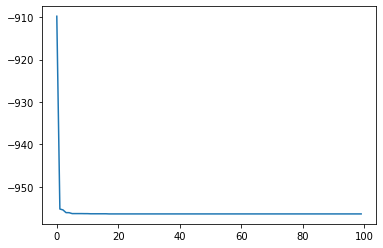

In [70]:
import matplotlib.pyplot as plt

plt.plot(fitness_values)
plt.show()

In [71]:
mejor_valor

-956.4084148648684

In [72]:
mejor_vector

[484.0014114973892, 434.51317398193726]